In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
import seaborn as sb
import os

In [2]:
os.getcwd()

'C:\\Users\\kiranpal\\Downloads\\jupiter\\AntrixProjects'

In [2]:
df=pd.read_csv("Bike-Sharing-Dataset/day.csv")
df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.index

RangeIndex(start=0, stop=731, step=1)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
df=pd.read_csv("Bike-Sharing-Dataset/hour.csv")
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [9]:
df.columns=["rec_id","datetime","season","year","month","hour","is_holiday","weekday",
             "is_workingday","weather_condition","temp","atemp","humidity","windspeed","user",
             "registered","total_count"]

In [10]:
df.head()

rec_id    datetime  season  year  month  hour  is_holiday  weekday  \
0       1  2011-01-01       1     0      1     0           0        6   
1       2  2011-01-01       1     0      1     1           0        6   
2       3  2011-01-01       1     0      1     2           0        6   
3       4  2011-01-01       1     0      1     3           0        6   
4       5  2011-01-01       1     0      1     4           0        6   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  user  \
0              0                  1  0.24  0.2879      0.81        0.0     3   
1              0                  1  0.22  0.2727      0.80        0.0     8   
2              0                  1  0.22  0.2727      0.80        0.0     5   
3              0                  1  0.24  0.2879      0.75        0.0     3   
4              0                  1  0.24  0.2879      0.75        0.0     0   

   registered  total_count  
0          13           16  
1          32           40  
2          27           32  
3          10           13  
4           1            1

In [9]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'user', 'registered', 'total_count'],
      dtype='object')

In [16]:
df.shape


(17379, 17)

In [17]:
df.dtypes

rec_id                 int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
is_holiday             int64
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
user                   int64
registered             int64
total_count            int64
dtype: object

In [18]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'user', 'registered', 'total_count'],
      dtype='object')

In [11]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
#[np.where(x) for x in df.cc.get_dummies().values]
#df['code'] = df.cc.cat.codes
#df.cc.astype('category').cat.codes
#df2 = pd.DataFrame(df.temp)
#df2.index = pd.CategoricalIndex(df.cc)
#df['code'] = pd.factorize(df['cc'])[0] + 1


"""from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['code'] = LE.fit_transform(df['cc'])

print(df)
"""
#season, is_holiday, weekday, weather_condition, is_workingday, month,year, hour to category type.
df[['season', 'month', 'hour', 'is_holiday',
    'weekday', 'is_workingday', 
    'weather_condition','year']]=df[['season', 'month', 'hour', 
                                     'is_holiday','weekday', 'is_workingday',
                                     'weather_condition','year']].astype('category')
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.dtypes

In [12]:
df.head(2)

rec_id   datetime season year month hour is_holiday weekday is_workingday  \
0       1 2011-01-01      1    0     1    0          0       6             0   
1       2 2011-01-01      1    0     1    1          0       6             0   

  weather_condition  temp   atemp  humidity  windspeed  user  registered  \
0                 1  0.24  0.2879      0.81        0.0     3          13   
1                 1  0.22  0.2727      0.80        0.0     8          32   

   total_count  
0           16  
1           40

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
rec_id               17379 non-null int64
datetime             17379 non-null datetime64[ns]
season               17379 non-null category
year                 17379 non-null category
month                17379 non-null category
hour                 17379 non-null category
is_holiday           17379 non-null category
weekday              17379 non-null category
is_workingday        17379 non-null category
weather_condition    17379 non-null category
temp                 17379 non-null float64
atemp                17379 non-null float64
humidity             17379 non-null float64
windspeed            17379 non-null float64
user                 17379 non-null int64
registered           17379 non-null int64
total_count          17379 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)
memory usage: 1.3 MB


In [23]:
df.sum()

rec_id               1.510235e+08
season               4.347600e+04
year                 8.734000e+03
month                1.136200e+05
hour                 2.006710e+05
is_holiday           5.000000e+02
weekday              5.220100e+04
is_workingday        1.186500e+04
weather_condition    2.477000e+04
temp                 8.637140e+03
atemp                8.268496e+03
humidity             1.090061e+04
windspeed            3.303706e+03
user                 6.200170e+05
registered           2.672662e+06
total_count          3.292679e+06
dtype: float64

In [13]:
x=df.corr()
x

rec_id      temp     atemp  humidity  windspeed      user  \
rec_id       1.000000  0.136178  0.137615  0.009577  -0.074505  0.158295   
temp         0.136178  1.000000  0.987672 -0.069881  -0.023125  0.459616   
atemp        0.137615  0.987672  1.000000 -0.051918  -0.062336  0.454080   
humidity     0.009577 -0.069881 -0.051918  1.000000  -0.290105 -0.347028   
windspeed   -0.074505 -0.023125 -0.062336 -0.290105   1.000000  0.090287   
user         0.158295  0.459616  0.454080 -0.347028   0.090287  1.000000   
registered   0.282046  0.335361  0.332559 -0.273933   0.082321  0.506618   
total_count  0.278379  0.404772  0.400929 -0.322911   0.093234  0.694564   

             registered  total_count  
rec_id         0.282046     0.278379  
temp           0.335361     0.404772  
atemp          0.332559     0.400929  
humidity      -0.273933    -0.322911  
windspeed      0.082321     0.093234  
user           0.506618     0.694564  
registered     1.000000     0.972151  
total_count    0.972151     1.000000

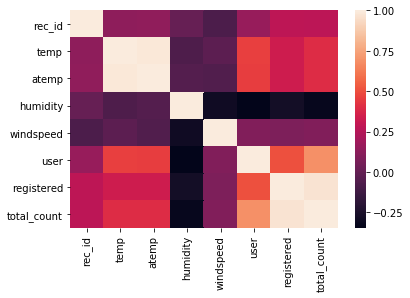

In [14]:
sb.heatmap(x)

In [15]:
df.describe()

rec_id          temp         atemp      humidity     windspeed  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.496987      0.475775      0.627229      0.190098   
std     5017.0295      0.192556      0.171850      0.192930      0.122340   
min        1.0000      0.020000      0.000000      0.000000      0.000000   
25%     4345.5000      0.340000      0.333300      0.480000      0.104500   
50%     8690.0000      0.500000      0.484800      0.630000      0.194000   
75%    13034.5000      0.660000      0.621200      0.780000      0.253700   
max    17379.0000      1.000000      1.000000      1.000000      0.850700   

               user    registered   total_count  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
std       49.305030    151.357286    181.387599  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.000000     40.000000  
50%       17.000000    115.000000    142.000000  
75%       48.000000    220.000000    281.000000  
max      367.000000    886.000000    977.000000

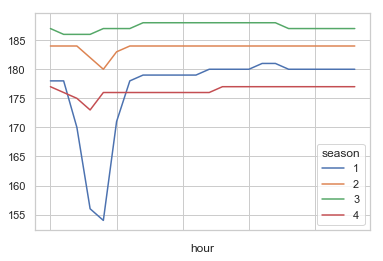

In [23]:
#  4.	visualize hourly ridership counts across the seasons and summarize the outcome
c=df.groupby(['season','hour'])['total_count'].count()
c.unstack(0).plot(kind='line')

C:\Users\kiranpal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


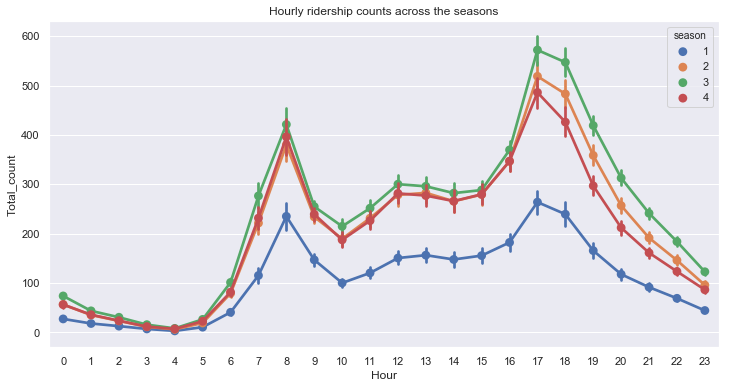

In [17]:
#  4.	visualize hourly ridership counts across the seasons and summarize the outcome

plt.figure(figsize=(12,6),edgecolor='black')
sb.set(style='darkgrid')
sb.pointplot('hour', 'total_count',data=df, hue='season')
plt.title('Hourly ridership counts across the seasons')
plt.xlabel('Hour')
plt.ylabel('Total_count')
plt.show()

In [18]:
# 5  Visualize monthly ridership trends and summarize the outcome
df.groupby(['month'])['total_count'].size().head()

month
1    1429
2    1341
3    1473
4    1437
5    1488
Name: total_count, dtype: int64

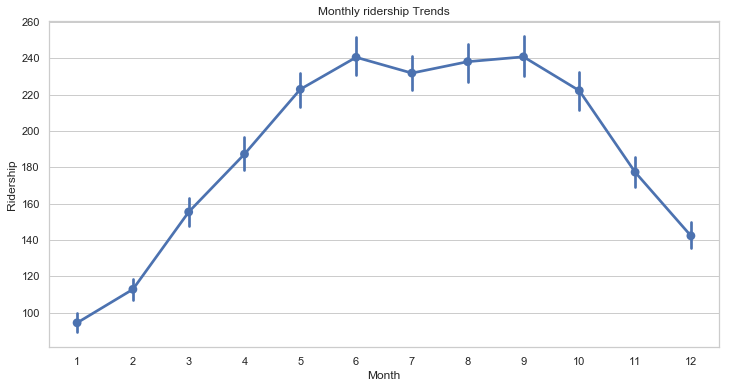

In [19]:
plt.figure(figsize=(12,6),edgecolor='yellow')
sb.set(style='whitegrid')
sb.pointplot('month', 'total_count',data=df)
plt.title('Monthly ridership Trends')
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.show()

In [24]:
#6) Visualize distribution of ridership across days of the week and summarize the outcome 
df.groupby(['weekday'])['total_count'].count().head()

weekday
0    2502
1    2479
2    2453
3    2475
4    2471
Name: total_count, dtype: int64

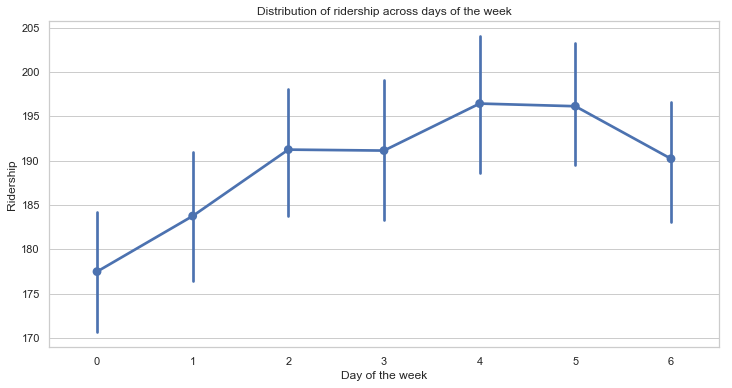

In [25]:
plt.figure(figsize=(12,6))
sb.set(style='whitegrid')
sb.pointplot('weekday', 'total_count',data=df)
plt.title('Distribution of ridership across days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Ridership')
plt.show()



In [27]:
#6b) Weekday wise hourly distrbution of mean total ridership distribution
df.groupby(['weekday','hour'])['total_count'].mean().head()


weekday  hour
0        0       93.990385
         1       77.432692
         2       61.627451
         3       31.144231
         4        9.362745
Name: total_count, dtype: float64

C:\Users\kiranpal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


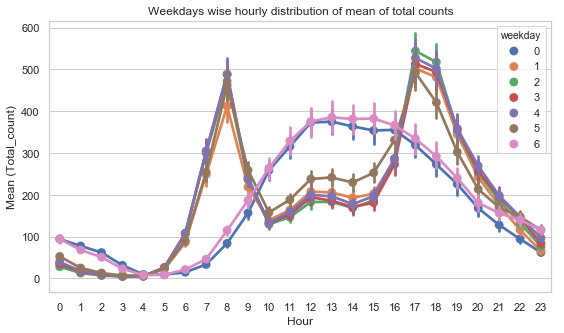

In [39]:
plt.figure(figsize=(9,5))
sb.set(style='whitegrid')
sb.pointplot('hour', 'total_count',data=df, hue='weekday')
plt.title('Weekdays wise hourly distribution of mean of total counts')
plt.xlabel('Hour')
plt.ylabel('Mean (Total_count)')
plt.show()

In [40]:
# 8.	visualize monthly ridership trends and summarize the outcome
df.groupby(['year'])['total_count'].size()

year
0    8645
1    8734
Name: total_count, dtype: int64

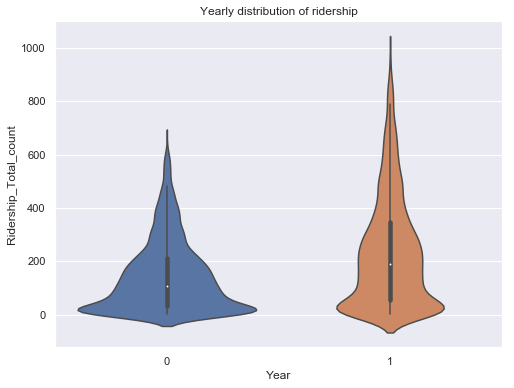

In [41]:
plt.figure(figsize=(8,6))
sb.set(style='darkgrid')
sb.violinplot('year','total_count',data=df)
plt.title('Yearly distribution of ridership')
plt.xlabel('Year')
plt.ylabel('Ridership_Total_count')
plt.show()

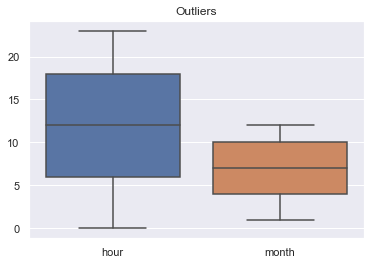

In [47]:
""" 9.	visualize and analyze outliers for numeric attributes like total_count, temperature, and wind_speed
, similarly try to check outliers at different granularity levels like hourly, monthly,
"""
#sb.boxplot(df[['total_count','temp','windspeed']])
sb.boxplot(data=df[['hour', 'month']])
plt.title('Outliers')
plt.show()


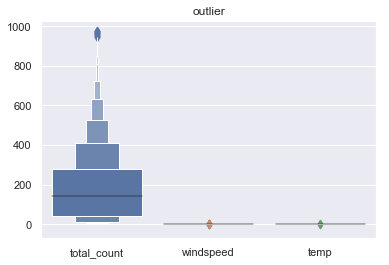

In [50]:
sb.boxenplot(data=df[['total_count','windspeed','temp']])
plt.title('outlier')
plt.show()

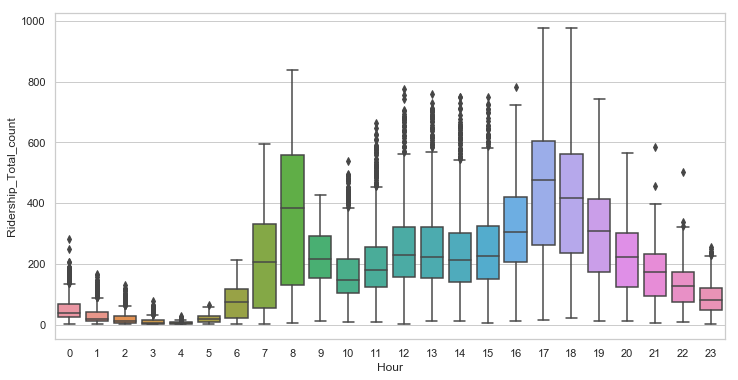

In [58]:
plt.figure(figsize=(12,6))
sb.set(style='whitegrid')
sb.boxplot('hour','total_count',data=df)
#sb.boxplot('month','total_count',data=df)
plt.xlabel('Hour')
plt.ylabel('Ridership_Total_count')
plt.show()


In [34]:


"""library(rpart)
library(rattle) #these libraries will be used to get a good visual plot for the decision tree model. 
library(rpart.plot)
library(RColorBrewer)
d=rpart(registered~hour,data=train)
fancyRpartPlot(d)
"""
#datetime.strftime(objDate,'%Y')
#datetime.strftime(objDate,'%b %d, %Y')
# objDate = datetime.strptime(strDate, '%m/%d/%y')

SyntaxError: invalid syntax (<ipython-input-34-270a63304038>, line 7)

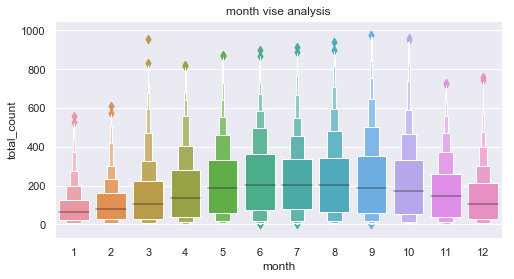

In [61]:
plt.figure(figsize=(8,4))
sb.set(style='darkgrid')
sb.boxenplot('month','total_count',data=df)
plt.title('month vise analysis')
plt.show()


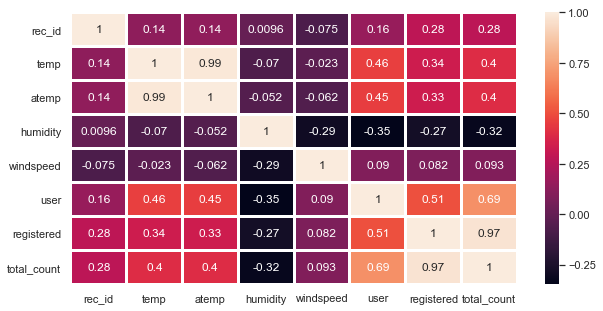

In [12]:
x=df.corr()
plt.figure(figsize=(10,5))
sb.set(style='darkgrid')
sb.heatmap(x,annot=True,linewidth=2)
plt.show()

In [13]:
df.head(3)

rec_id   datetime season year month hour is_holiday weekday is_workingday  \
0       1 2011-01-01      1    0     1    0          0       6             0   
1       2 2011-01-01      1    0     1    1          0       6             0   
2       3 2011-01-01      1    0     1    2          0       6             0   

  weather_condition  temp   atemp  humidity  windspeed  user  registered  \
0                 1  0.24  0.2879      0.81        0.0     3          13   
1                 1  0.22  0.2727      0.80        0.0     8          32   
2                 1  0.22  0.2727      0.80        0.0     5          27   

   total_count  
0           16  
1           40  
2           32

In [15]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
user                          int64
registered                    int64
total_count                   int64
dtype: object

In [24]:
df[['season', 'month', 'hour', 'is_holiday',
    'weekday', 'is_workingday', 
    'weather_condition','year']]=df[['season', 'month', 'hour', 
                                     'is_holiday','weekday', 'is_workingday',
                                     'weather_condition','year']].astype('float')


In [140]:
df.dtypes

rec_id                  int64
datetime             category
season                float64
year                  float64
month                 float64
hour                  float64
is_holiday            float64
weekday               float64
is_workingday         float64
weather_condition     float64
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
user                    int64
registered              int64
total_count             int64
pre_total_count       float64
dtype: object

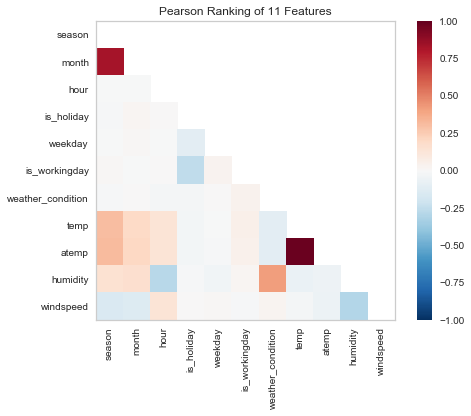

In [144]:
from yellowbrick.features import Rank2D

X = df[[
    "season", "month", "hour", "is_holiday", "weekday", "is_workingday",
    "weather_condition", "temp","atemp", "humidity", "windspeed"
]]


visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

In [28]:
df.head(2)

rec_id   datetime  season  year  month  hour  is_holiday  weekday  \
0       1 2011-01-01     1.0   0.0    1.0   0.0         0.0      6.0   
1       2 2011-01-01     1.0   0.0    1.0   1.0         0.0      6.0   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  user  \
0            0.0                1.0  0.24  0.2879      0.81        0.0     3   
1            0.0                1.0  0.22  0.2727      0.80        0.0     8   

   registered  total_count  
0          13           16  
1          32           40

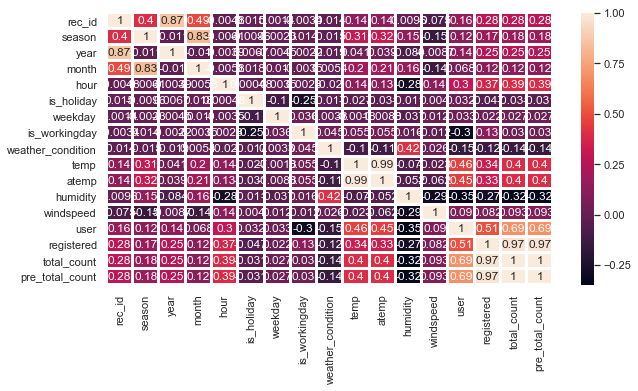

In [83]:
x=df.corr()
plt.figure(figsize=(10,5))
sb.set(style='darkgrid')
sb.heatmap(x,annot=True,linewidth=2)
plt.show()

In [160]:
#12.Start linear regression modeling our Bike Sharing dataset and solve the business problem of predicting bike demand for a given date tim
from sklearn import linear_model as lm
#from sklearn import svm
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [112]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'user', 'registered', 'total_count',
       'pre_total_count'],
      dtype='object')

In [146]:
I=df.loc[:,['hour','registered','temp','atemp']]
P=df.loc[:,['total_count']]


In [147]:
x_train,x_test,y_train,y_test=train_test_split(I,P,test_size=0.25)

In [148]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13034, 4)
(4345, 4)
(13034, 1)
(4345, 1)


In [149]:
I.head(2)

hour  registered  temp   atemp
0   0.0          13  0.24  0.2879
1   1.0          32  0.22  0.2727

In [131]:
P.head(2)

total_count
0           16
1           40

In [153]:
X=I.head(1000)
Y=P.head(1000)

In [133]:
l.score(x_test,y_test)

0.9565513484953696

In [161]:
df['pre_total_count']=l.predict(I)


In [162]:
print('r2_score:',metrics.r2_score(df['total_count'],df['pre_total_count']))

r2_score: 0.9530590812311317


In [135]:
df.groupby(['total_count','pre_total_count'])['pre_total_count'].value_counts().head()

total_count  pre_total_count  pre_total_count
1            -28.635104       -28.635104         1
             -27.796055       -27.796055         1
             -27.785498       -27.785498         1
             -26.782697       -26.782697         1
             -26.148134       -26.148134         1
Name: pre_total_count, dtype: int64

In [163]:
df['SSE']=(df['total_count']-df['pre_total_count'])**2

In [164]:
df.head()

rec_id   datetime  season  year  month  hour  is_holiday  weekday  \
0       1 2011-01-01     1.0   0.0    1.0   0.0         0.0      6.0   
1       2 2011-01-01     1.0   0.0    1.0   1.0         0.0      6.0   
2       3 2011-01-01     1.0   0.0    1.0   2.0         0.0      6.0   
3       4 2011-01-01     1.0   0.0    1.0   3.0         0.0      6.0   
4       5 2011-01-01     1.0   0.0    1.0   4.0         0.0      6.0   

   is_workingday  weather_condition  temp   atemp  humidity  windspeed  user  \
0            0.0                1.0  0.24  0.2879      0.81        0.0     3   
1            0.0                1.0  0.22  0.2727      0.80        0.0     8   
2            0.0                1.0  0.22  0.2727      0.80        0.0     5   
3            0.0                1.0  0.24  0.2879      0.75        0.0     3   
4            0.0                1.0  0.24  0.2879      0.75        0.0     0   

   registered  total_count  pre_total_count         SSE  
0          13           16         0.657114  235.404161  
1          32           40        21.094561  357.415620  
2          27           32        16.413792  242.929891  
3          10           13         0.005946  168.845442  
4           1            1        -9.138537  102.789933

In [165]:
df.sum()

rec_id               1.510235e+08
datetime             2.303547e+22
season               4.347600e+04
year                 8.734000e+03
month                1.136200e+05
hour                 2.006710e+05
is_holiday           5.000000e+02
weekday              5.220100e+04
is_workingday        1.186500e+04
weather_condition    2.477000e+04
temp                 8.637140e+03
atemp                8.268495e+03
humidity             1.090061e+04
windspeed            3.303706e+03
user                 6.200170e+05
registered           2.672662e+06
total_count          3.292679e+06
pre_total_count      3.294087e+06
SSE                  2.683901e+07
dtype: float64

In [170]:
df0=df.head(500)


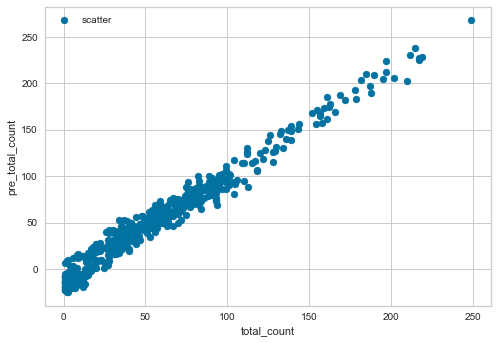

In [199]:
plt.scatter(df0['total_count'],df0['pre_total_count'],label='scatter')
plt.xlabel('total_count')
plt.ylabel('pre_total_count')
plt.legend()
plt.show()

In [195]:
xx=df0['total_count']
yy=df0['pre_total_count']
xx.head(2)
#plt.plot(xx,l.intercept_*xx+l.coef_ , label = 'line' , c='r')

0    16
1    40
Name: total_count, dtype: int64

In [194]:
i=l.intercept_
c=np.hstack(l.coef_)
print(i)
print(c)
y=c[0]*xx+c[1]*xx+c[2]*xx+c[3]*xx+i


[-33.56760887]
[ 0.89887246  1.11592838 85.01221084 -2.3802605 ]


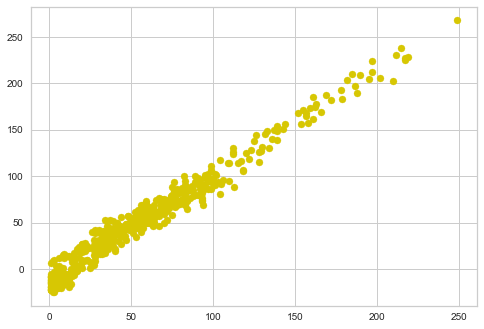

In [201]:
plt.scatter(xx,yy,c='y')
plt.plot(xx, y , label = 'line' , c='r')

In [125]:
df.dtypes

rec_id                  int64
datetime             category
season                float64
year                  float64
month                 float64
hour                  float64
is_holiday            float64
weekday               float64
is_workingday         float64
weather_condition     float64
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
user                    int64
registered              int64
total_count             int64
pre_total_count       float64
dtype: object

In [ ]:
4.	visualize hourly ridership counts across the seasons and summarize the outcome
5.	visualize monthly ridership trends and summarize the outcome
6.	visualize distribution of ridership across days of the week and summarize the outcome
7.	visualize monthly ridership trends and summarize the outcome
8.	plots yearly distribution on violin  plots and summarize the outcome
9.	visualize and analyze outliers for numeric attributes like total_count, temperature, and wind_speed, similarly try to check outliers at different granularity levels like hourly, monthly,
10.	prepares a correlational matrix on given dataset 
11.	Since the dataset contains multiple categorical variables, it is imperative that we should encode the nominal ones(categorical columns)
12.	Start linear regression modeling our Bike Sharing dataset and solve the business 
problem of predicting bike demand for a given date time
13.	Generate scatter plot between residuals and observed values 
